In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import requests
from io import StringIO

In [2]:
# Pobierz dane z UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), delim_whitespace=True, names=column_names)

In [3]:
# Usuń kolumnę 'car_name', ponieważ nie będzie używana w analizie
data.drop('car_name', axis=1, inplace=True)

# Zastąp brakujące wartości znakiem zapytania
data.replace('?', np.nan, inplace=True)

# Konwertuj kolumnę 'horsepower' na typ liczbowy
data['horsepower'] = pd.to_numeric(data['horsepower'])

# Usuń wiersze z brakującymi wartościami
data.dropna(inplace=True)

In [4]:
# Podziel dane na funkcje (features) i etykiety (labels)
X = data.drop('mpg', axis=1).values
y = data['mpg'].values

# Podziel dane na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalizacja danych
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [9]:
# Definicja modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
history = model.fit(X_train_normalized, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [11]:
loss = model.evaluate(X_test_normalized, y_test)
print("Test Loss:", loss)

3/3 [==============================] - 0s 2ms/step - loss: 19.1607
Test Loss: 19.16066551208496


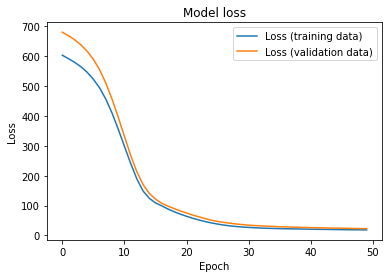

In [13]:
# Wyświetlenie wykresu
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()